In [18]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [19]:
import tensorflow
from tensorflow import keras
import os

train_images = os.getcwd() + "\\Face Images\\Final Training Images"

## Image Preprocessing using keras


# As we know deep-learning is hungry for data, the data we have is only limited. 
# so lets perform **Image Agumentation** to create different versions
# of the original image, which leads to a better model, since it learns
# on the good and bad mix of images.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
# No transformations are made on the test data
test_gen = ImageDataGenerator()

# Generating training data
training_data = train_gen.flow_from_directory(
    train_images, 
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'categorical'
)

# generating test data
testing_data = test_gen.flow_from_directory(
    train_images, 
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'categorical'
)

# Printing class labels for each face
testing_data.class_indices

Found 395 images belonging to 31 classes.
Found 395 images belonging to 31 classes.


{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face17': 8,
 'face18': 9,
 'face19': 10,
 'face2': 11,
 'face20': 12,
 'face21': 13,
 'face22': 14,
 'face23': 15,
 'face24': 16,
 'face25': 17,
 'face26': 18,
 'face27': 19,
 'face28': 20,
 'face29': 21,
 'face3': 22,
 'face30': 23,
 'face31': 24,
 'face4': 25,
 'face5': 26,
 'face6': 27,
 'face7': 28,
 'face8': 29,
 'face9': 30}

In [20]:
Train_class = training_data.class_indices

# lets store them in a dictionary with swap for future reference
Result_class = {}
for value_tag, face_tag in zip(Train_class.values(),Train_class.keys()):
    Result_class[value_tag] = face_tag

    
# use pickle to save the mapping's
import pickle
with open(os.getcwd()+"\\model\\ResultMap.pkl",'wb') as Final_mapping:
    pickle.dump(Result_class,Final_mapping)


In [21]:
from pprint import pprint
print("Mapping of Face and its numeric value : \n")
pprint(Result_class)

Output_Neurons=len(Result_class)

print("\n\nNumber of Output Neurons in softmax : ",Output_Neurons)

Mapping of Face and its numeric value : 

{0: 'face1',
 1: 'face10',
 2: 'face11',
 3: 'face12',
 4: 'face13',
 5: 'face14',
 6: 'face15',
 7: 'face16',
 8: 'face17',
 9: 'face18',
 10: 'face19',
 11: 'face2',
 12: 'face20',
 13: 'face21',
 14: 'face22',
 15: 'face23',
 16: 'face24',
 17: 'face25',
 18: 'face26',
 19: 'face27',
 20: 'face28',
 21: 'face29',
 22: 'face3',
 23: 'face30',
 24: 'face31',
 25: 'face4',
 26: 'face5',
 27: 'face6',
 28: 'face7',
 29: 'face8',
 30: 'face9'}


Number of Output Neurons in softmax :  31


In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

'''Initializing the Convolutional Neural Network'''
Model = Sequential()

''' STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (100,100,3) because we are using TensorFlow backend
# It means 3 matrix of size (100x100) pixels representing Red, Green and Blue components of pixels
'''

Model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), input_shape=(100, 100, 3), activation='relu'))

'''# Max pooling layer'''
Model.add(MaxPool2D(pool_size=(2, 2)))

'''Adding additional layers of convolution and 
        max pooling for better model accuracy and performance'''
Model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
Model.add(MaxPool2D(pool_size=(2, 2)))

'''# Add a flatten layer to convert the vector to one dimensional'''
Model.add(Flatten())

'''Add dense layers and Initialize weights using 
                kernel initializer for better learning of image features and classification'''
Model.add(Dense(64, activation='relu'))
Model.add(Dense(Output_Neurons, activation='softmax'))

'''Perform Model Compilation'''
Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

'''# Using Early stopping to reduce the training time'''
from keras.callbacks import EarlyStopping

call = EarlyStopping(
    min_delta=0.005,
    patience=5,
    verbose=1
)

Model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 96, 96, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 48, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 46, 46, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     1,083,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 31)             │         2,015 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,091,327 (4.16 MB)

 Trainable params: 1,091,327 (4.16 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
import time
# Measuring the time taken by the model to train
StartTime = time.time()

'''# Model Training'''
history = Model.fit(
    training_data,
    epochs=30,
    validation_data=testing_data,
    callbacks=[call]
)

Endtime = time.time()
print('Total Training Time taken: ', round((Endtime - StartTime) / 60), 'Minutes')


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 176s 13s/step - accuracy: 0.0175 - loss: 174.3067 - val_accuracy: 0.0101 - val_loss: 26.0702
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 136s 10s/step - accuracy: 0.0567 - loss: 15.8790 - val_accuracy: 0.0506 - val_loss: 3.5518
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 133s 10s/step - accuracy: 0.0671 - loss: 3.4011 - val_accuracy: 0.1392 - val_loss: 2.8635
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 136s 10s/step - accuracy: 0.1016 - loss: 2.9788 - val_accuracy: 0.1494 - val_loss: 2.7510
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 134s 10s/step - accuracy: 0.1874 - loss: 2.7604 - val_accuracy: 0.2076 - val_loss: 2.4695
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 136s 10s/step - accuracy: 0.2127 - loss: 2.4972 - val_accuracy: 0.2987 - val_loss: 2.2386
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 133s 10s/step - accuracy: 0.2920 - loss: 2.2763 - val_accuracy: 0.4506 - val_loss: 1.7528
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 136s 10s/step - accuracy: 0.4559 - loss: 1.7879 - val_accuracy

In [26]:
import numpy as np
from keras.preprocessing import image
import os
import glob

'''########### Making single predictions ###########'''

ImagePath= os.getcwd() + "\\Face Images\\Final Training Images\\face1\\image_0001_Face_1.jpg"
test_image=image.load_img(ImagePath,target_size=(100, 100))
test_image=image.img_to_array(test_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result=Model.predict(test_image,verbose=0)
#print(training_set.class_indices)
 
print('####'*10)
print('Prediction is: ',Result_class[np.argmax(result)])


########################################
Prediction is:  face6


In [27]:
'''############ Making multiple predictions ###########'''

## Loading all the image paths from final testing folder for prediction
main_ = os.getcwd() + "\\Face Images\\Final Testing Images"
img_paths = glob.glob(os.path.join(main_,'**','*.jpg'))

print(img_paths[0:5]) # every image will be a PIL object
print('*'*50)

for path in img_paths:
    test_image = image.load_img(path,target_size=(100,100))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image,axis =0)
    result = Model.predict(test_image,verbose=0)
    print('Prediction: ',Result_class[np.argmax(result)])

['c:\\Users\\yassi\\OneDrive\\Documents\\01_CURRENT_PROJECTS\\Face-Recognition-Performance-and-Efficiency-A-Comparative-Study-of-PCA-and-a-Machine-Learning-Model\\Face Images\\Final Testing Images\\face1\\image_0001_Face_1.jpg', 'c:\\Users\\yassi\\OneDrive\\Documents\\01_CURRENT_PROJECTS\\Face-Recognition-Performance-and-Efficiency-A-Comparative-Study-of-PCA-and-a-Machine-Learning-Model\\Face Images\\Final Testing Images\\face1\\image_0002_Face_2.jpg', 'c:\\Users\\yassi\\OneDrive\\Documents\\01_CURRENT_PROJECTS\\Face-Recognition-Performance-and-Efficiency-A-Comparative-Study-of-PCA-and-a-Machine-Learning-Model\\Face Images\\Final Testing Images\\face1\\image_0003_Face_1.jpg', 'c:\\Users\\yassi\\OneDrive\\Documents\\01_CURRENT_PROJECTS\\Face-Recognition-Performance-and-Efficiency-A-Comparative-Study-of-PCA-and-a-Machine-Learning-Model\\Face Images\\Final Testing Images\\face1\\image_0004_Face_1.jpg', 'c:\\Users\\yassi\\OneDrive\\Documents\\01_CURRENT_PROJECTS\\Face-Recognition-Performan

### Evaluate on the Test Data

In [28]:
# Generating test data
testing_data = test_gen.flow_from_directory(
    train_images, 
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'categorical'
)

Found 395 images belonging to 31 classes.


In [29]:
# Evaluate the model on the test data
loss, accuracy = Model.evaluate(testing_data, verbose=2)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


c:\Users\yassi\OneDrive\Documents\01_CURRENT_PROJECTS\Face-Recognition-Performance-and-Efficiency-A-Comparative-Study-of-PCA-and-a-Machine-Learning-Model\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 - 63s - 5s/step - accuracy: 0.6684 - loss: 1.1547
Test Loss: 1.1547
Test Accuracy: 0.6684


### Generate Predictions

In [30]:
# Generate predictions
predictions = Model.predict(testing_data)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = testing_data.classes

# Print some sample predictions
for i in range(5):
    print(f'True: {true_classes[i]}, Predicted: {predicted_classes[i]}')


14/14 ━━━━━━━━━━━━━━━━━━━━ 68s 5s/step
True: 0, Predicted: 9
True: 0, Predicted: 6
True: 0, Predicted: 2
True: 0, Predicted: 1
True: 0, Predicted: 28


### Confusion Matrix

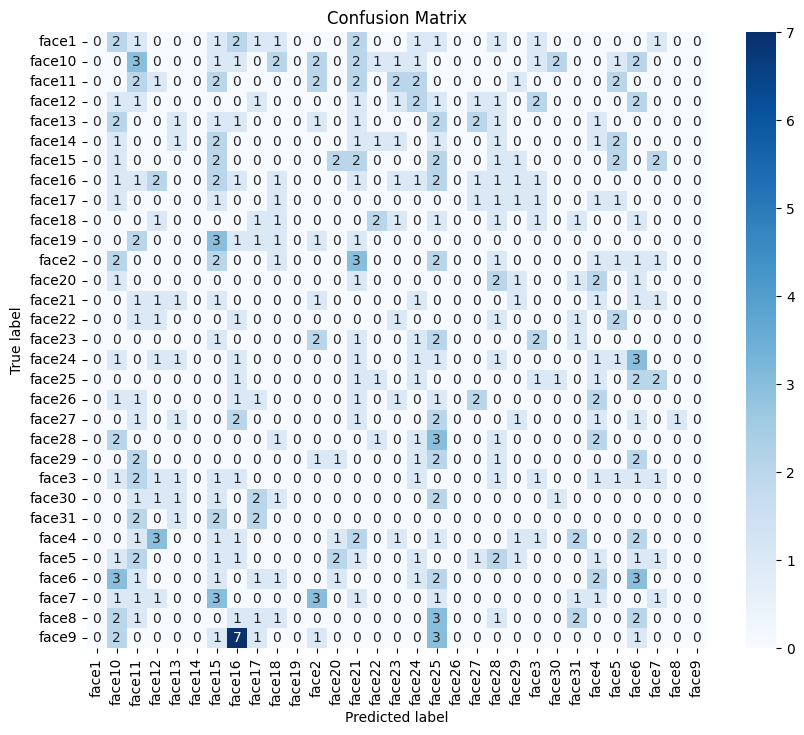

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=testing_data.class_indices.keys(), yticklabels=testing_data.class_indices.keys())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

### Visualizing Performance Over Epochs

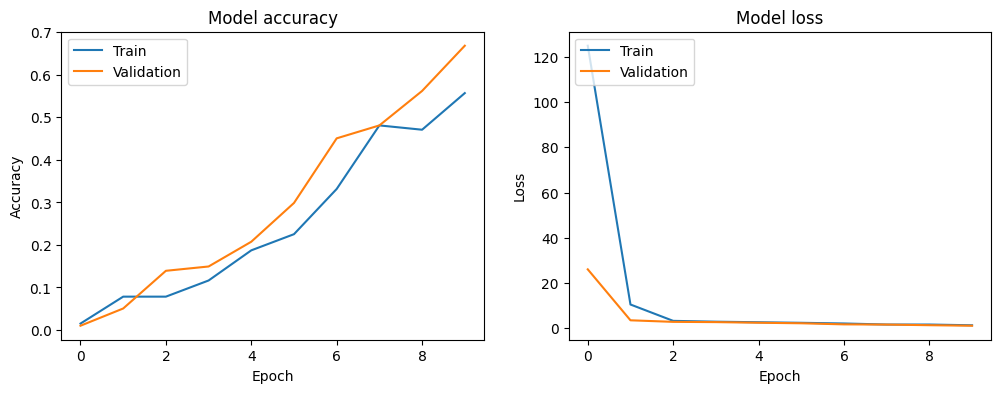

In [34]:
# Assuming `history` is the result of model.fit()
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Saving the CNN model

In [35]:
# saving the model
Model.save(os.getcwd()+"\\model\\Face_Recognition_Model.h5")